In [0]:
# General libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Libraries for Conv
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
# Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
# Importing the data and normalizing it
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [37]:
# Preparing the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
class Encoder(Sequential):
    def __init__(self):
        super().__init__()
        # Notice the Conv2D layers
        self.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
        self.add(MaxPooling2D((2, 2), padding='same'))
        self.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
        self.add(MaxPooling2D((2, 2), padding='same'))
        self.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
        self.add(MaxPooling2D((2, 2), padding='same'))

In [0]:
class Decoder(Sequential):
    def __init__(self):
        super().__init__()
        # Adding the Conv2D layers to the decoder as well
        self.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
        self.add(UpSampling2D((2, 2)))
        self.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
        self.add(UpSampling2D((2, 2)))
        self.add(Conv2D(16, (3, 3), activation='relu'))
        self.add(UpSampling2D((2, 2)))
        self.add(Conv2D(1, (3,3), activation='sigmoid', padding='same'))

In [0]:
encoder = Encoder()
decoder = Decoder()

In [0]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'mean_squared_error',
                                               optimizer= SGD(1.5),
                                               metrics=['accuracy'])

In [42]:
autoencoder_conv_results = autoencoder.fit(X_train, X_train,
                epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0357 - accuracy: 0.7998
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0231 - accuracy: 0.8069
Epoch 3/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0201 - accuracy: 0.8086
Epoch 4/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0184 - accuracy: 0.8096
Epoch 5/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0172 - accuracy: 0.8103


In [0]:
image_batch = autoencoder.predict(X_test[:10])

In [0]:
X_train = X_train.reshape([X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test = X_test.reshape([X_test.shape[0], X_test.shape[1] * X_test.shape[2]])

Let's see how PCA compares now:

In [0]:
n_components = 20

pca = PCA(n_components=n_components)
pca.fit(X_train)

num_elements = X_test.shape[0]
X_test_PCA = pca.fit_transform(X_test)

In [0]:
X_rec_pca = pca.inverse_transform(X_test_PCA)

In [0]:
X_rec_pca = np.reshape(X_rec_pca[:10], (10,28,28))
X_test = np.reshape(X_test[:10], (10,28,28))

In [0]:
# The function is a little different here than in the previous examples
def plotter(data, title):
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(10):
        ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(data[i].reshape(28,28), 
                cmap=plt.cm.binary, interpolation='nearest')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(title, fontsize='medium')

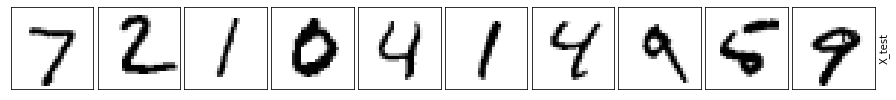

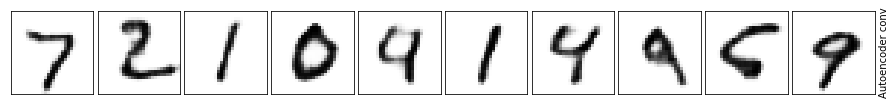

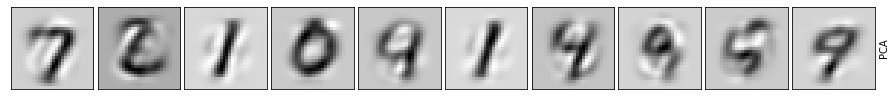

In [49]:
plotter(X_test, 'X_test')
plotter(image_batch, 'Autoencoder conv')
plotter(X_rec_pca, 'PCA')